ASSIGNMENT: CALLBACK_FUNCTION

1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
!pip install tensorflow


In [2]:
!pip install keras

In [3]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


2023-06-16 05:31:12.545784: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 05:31:12.615357: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 05:31:12.617514: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 05:31:13.806285: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensorFlow version: 2.12.0
Keras version: 2.12.0


2. Load the Wine Quality dataset and explore its dimensions

In [4]:
import pandas as pd


In [7]:
wine_data = pd.read_csv('wine.csv')


In [8]:
print("Dataset dimensions:", wine_data.shape)


Dataset dimensions: (1599, 12)


In [9]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


3. Check for null values, identify categorical variables, and encode them.

In [10]:
print("Null value count:\n", wine_data.isnull().sum())


Null value count:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [11]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [12]:
categorical_vars = ['quality']


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for var in categorical_vars:
    wine_data[var] = label_encoder.fit_transform(wine_data[var])


In [14]:
wine_data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0


In [15]:
wine_data.quality.unique()

array([0, 1])

4. Separate the features and target variables from the dataframe.

In [16]:
# Separate the features (X) and target variable (y)
X = wine_data.drop('quality', axis=1)  # Features (all columns except 'quality')
y = wine_data['quality']  # Target variable ('quality' column)


5.  Perform a train-test split and divide the data into training, validation, and test datasets

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


6. Perform scaling on the dataset

In [18]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training set and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test sets using the fitted scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [19]:
from keras.models import Sequential
from keras.layers import Dense

# Define the number of features in your dataset
num_features = X_train_scaled.shape[1]




8. Create a Sequential model and add all the layers to it.

In [20]:
# Create a sequential model
model = Sequential()

# Add the first hidden layer
model.add(Dense(64, activation='relu', input_shape=(num_features,)))

# Add the second hidden layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

9. Implement a TensorBoard callback to visualize and monitor the model's training process.


In [21]:
import tensorflow as tf
from keras.callbacks import TensorBoard

# Define the log directory for TensorBoard
log_dir = "logs/"

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Compile and fit the model with the TensorBoard callback
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val),
          callbacks=[tensorboard_callback])


Epoch 1/10
32/32 [==============================] - 1s 13ms/step - loss: 0.6438 - accuracy: 0.6530 - val_loss: 0.5966 - val_accuracy: 0.7500
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5507 - accuracy: 0.7243 - val_loss: 0.5574 - val_accuracy: 0.7227
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.5191 - accuracy: 0.7419 - val_loss: 0.5446 - val_accuracy: 0.7500
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5087 - accuracy: 0.7410 - val_loss: 0.5399 - val_accuracy: 0.7500
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4998 - accuracy: 0.7556 - val_loss: 0.5344 - val_accuracy: 0.7500
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4928 - accuracy: 0.7576 - val_loss: 0.5366 - val_accuracy: 0.7617
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4866 - accuracy: 0.7625 - val_loss: 0.5298 - val_accuracy: 0.7656
Epoch 8/10
32/32 [=

10.  Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if 
no improvement is observed

In [22]:
from keras.callbacks import EarlyStopping

# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compile and fit the model with the EarlyStopping callback
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val),
          callbacks=[early_stopping])


Epoch 1/20
32/32 [==============================] - 1s 8ms/step - loss: 0.4712 - accuracy: 0.7644 - val_loss: 0.5280 - val_accuracy: 0.7734
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.7703 - val_loss: 0.5294 - val_accuracy: 0.7656
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4603 - accuracy: 0.7674 - val_loss: 0.5335 - val_accuracy: 0.7656
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4570 - accuracy: 0.7752 - val_loss: 0.5283 - val_accuracy: 0.7734


11.  Implement a ModelCheckpoint callback to save the best model based on a chosen metric during 
training

In [23]:
from keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filename
checkpoint_path = 'best_model.h5'

# Create a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')

# Compile and fit the model with the ModelCheckpoint callback
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val),
          callbacks=[checkpoint_callback])


Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 0.4696 - accuracy: 0.7654 - val_loss: 0.5246 - val_accuracy: 0.7656
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.7752 - val_loss: 0.5271 - val_accuracy: 0.7617
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7732 - val_loss: 0.5334 - val_accuracy: 0.7695
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.7781 - val_loss: 0.5366 - val_accuracy: 0.7656
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.7791 - val_loss: 0.5358 - val_accuracy: 0.7812
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.7830 - val_loss: 0.5335 - val_accuracy: 0.7695
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.7761 - val_loss: 0.5316 - val_accuracy: 0.7734
Epoch 8/10
32/32 [==

12. Print the model summary

In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [25]:
from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


14.  Compile the model with the specified loss function, optimizer, and metrics.
15.  Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint 
callbacks.

In [26]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Define the paths for TensorBoard logs and the best model checkpoint
log_dir = 'logs/'
checkpoint_path = 'best_model.h5'

# Create TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=log_dir)

# Create EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Create ModelCheckpoint callback
model_checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)

# Fit the model with callbacks
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback])


Epoch 1/20
32/32 [==============================] - 1s 9ms/step - loss: 4.6162 - accuracy: 0.5875 - val_loss: 2.0031 - val_accuracy: 0.6445
Epoch 2/20
32/32 [==============================] - 0s 6ms/step - loss: 1.1703 - accuracy: 0.6217 - val_loss: 0.7408 - val_accuracy: 0.5820
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.6432 - val_loss: 0.5831 - val_accuracy: 0.6836
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.6432 - val_loss: 0.6435 - val_accuracy: 0.5898
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6102 - accuracy: 0.6413 - val_loss: 0.5795 - val_accuracy: 0.6836
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6186 - accuracy: 0.6549 - val_loss: 0.6059 - val_accuracy: 0.6758
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6010 - accuracy: 0.6540 - val_loss: 0.5625 - val_accuracy: 0.7266
Epoch 8/20
32/32 [==

16.  Get the model's parameters

In [27]:
model_weights = model.get_weights()

for layer_idx, layer_weights in enumerate(model_weights):
    print(f"Layer {layer_idx} weights shape: {layer_weights.shape}")


Layer 0 weights shape: (11, 64)
Layer 1 weights shape: (64,)
Layer 2 weights shape: (64, 32)
Layer 3 weights shape: (32,)
Layer 4 weights shape: (32, 1)
Layer 5 weights shape: (1,)


17. Store the model's training history as a Pandas DataFrame.

In [28]:
import pandas as pd

# Convert the model's training history to a DataFrame
history_df = pd.DataFrame(history.history)

# Print the DataFrame
print(history_df)


        loss  accuracy  val_loss  val_accuracy
0   4.616190  0.587488  2.003134      0.644531
1   1.170319  0.621701  0.740772      0.582031
2   0.654718  0.643206  0.583105      0.683594
3   0.621480  0.643206  0.643526      0.589844
4   0.610235  0.641251  0.579499      0.683594
5   0.618611  0.654936  0.605910      0.675781
6   0.600951  0.653959  0.562482      0.726562
7   0.620901  0.657869  0.592378      0.640625
8   0.574594  0.694037  0.561150      0.699219
9   0.597650  0.669599  0.556317      0.722656
10  0.604430  0.658847  0.570213      0.718750
11  0.582999  0.702835  0.613197      0.628906
12  0.573980  0.710655  0.546432      0.734375
13  0.585418  0.695015  0.567545      0.664062
14  0.572372  0.695015  0.557685      0.734375
15  0.607935  0.675464  0.568816      0.703125


18. Plot the model's training history.

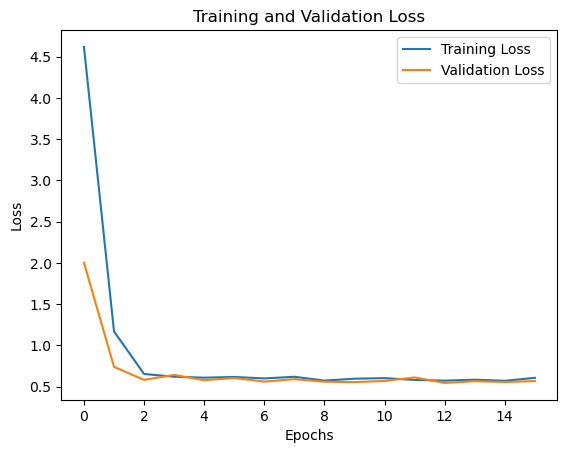

In [29]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


19.  Evaluate the model's performance using the test data.

In [30]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


10/10 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.6969
Test Loss: 0.6044
Test Accuracy: 0.6969
